In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [28]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA','RYCEY','AAL']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [29]:
company_list = [AAPL, GOOG, MSFT, AMZN, TSLA, RYCEY, AAL]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","TSLA", "RYCEY" ,"AAL"]
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
df = pd.concat(company_list, axis=0)
print(df)

                 High        Low  ...  Adj Close  company_name
Date                              ...                         
2019-12-03  64.882500  64.072502  ...  63.784916         APPLE
2019-12-04  65.827499  65.169998  ...  64.347893         APPLE
2019-12-05  66.472504  65.682503  ...  65.291946         APPLE
2019-12-06  67.750000  66.824997  ...  66.553131         APPLE
2019-12-09  67.699997  66.227501  ...  65.621384         APPLE
...               ...        ...  ...        ...           ...
2020-11-27  15.560000  14.950000  ...  14.980000           AAL
2020-11-30  14.960000  13.930000  ...  14.130000           AAL
2020-12-01  14.780000  14.240000  ...  14.270000           AAL
2020-12-02  14.860000  13.850000  ...  14.860000           AAL
2020-12-03  16.500000  15.160000  ...  16.295000           AAL

[1778 rows x 7 columns]


In [30]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,92.080689,89.484183,90.751762,90.854882,1.488441e+08,90.260210
std,21.003117,20.345626,20.862122,20.642888,7.780731e+07,21.001202
min,57.125000,53.152500,57.020000,56.092499,2.019780e+07,55.291519
25%,74.784374,71.726250,72.562498,73.245003,1.022816e+08,72.186443
50%,82.450001,80.822502,81.174999,82.337502,1.345164e+08,81.788677
75%,115.415001,112.215000,113.939999,113.407499,1.842475e+08,113.212183
max,137.979996,130.529999,137.589996,134.179993,4.268848e+08,133.948898


In [31]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-12-03 to 2020-12-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    float64
 5   Adj Close     254 non-null    float64
 6   company_name  254 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


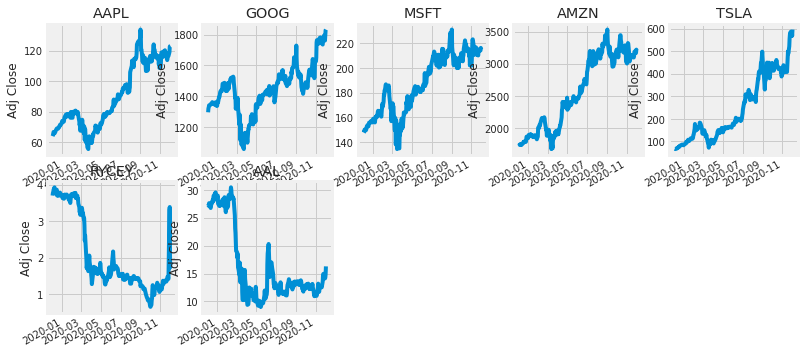

In [38]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(4, 5, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

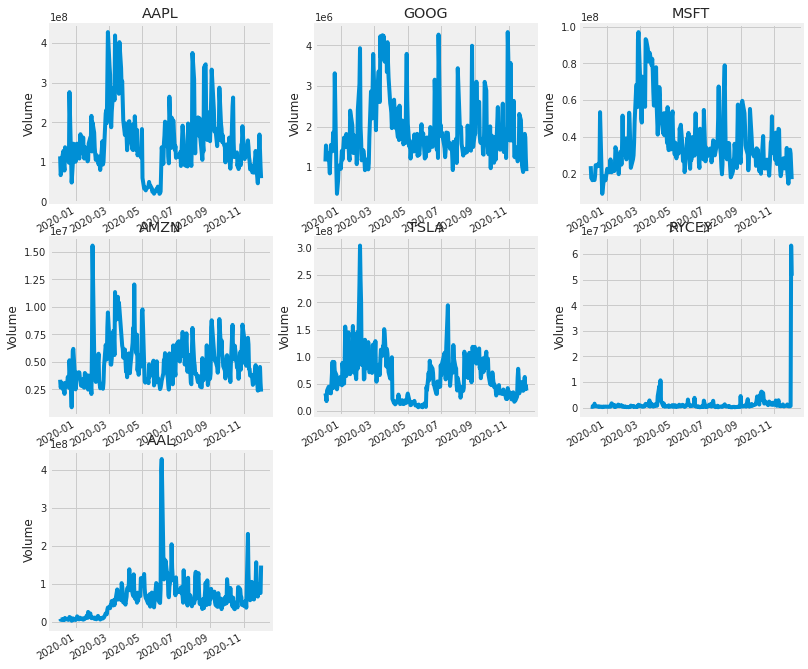

In [40]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

This is average movings for each stock.

In [46]:
ma_day = [10, 20, 50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [47]:
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


company_name
AAL          [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
AMAZON       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
APPLE        [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
GOOGLE       [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
MICROSOFT    [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
RYCEY        [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
TSLA         [[AxesSubplot(0.08,0.670278;0.378261x0.209722)...
dtype: object

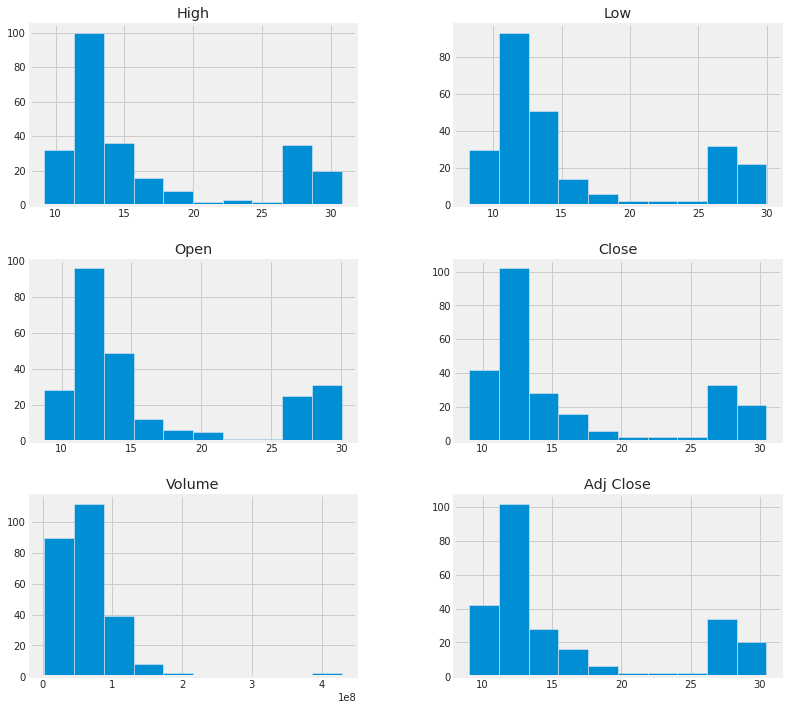

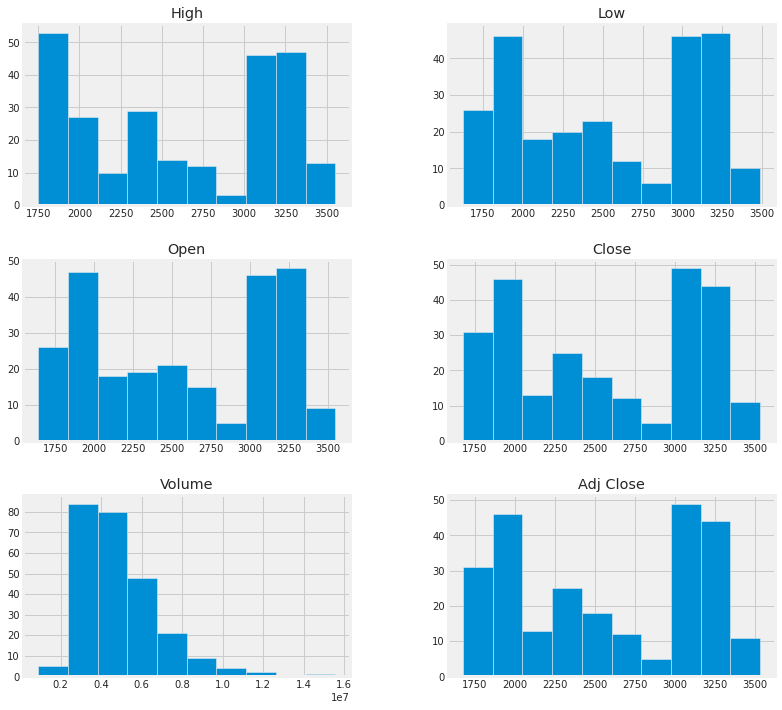

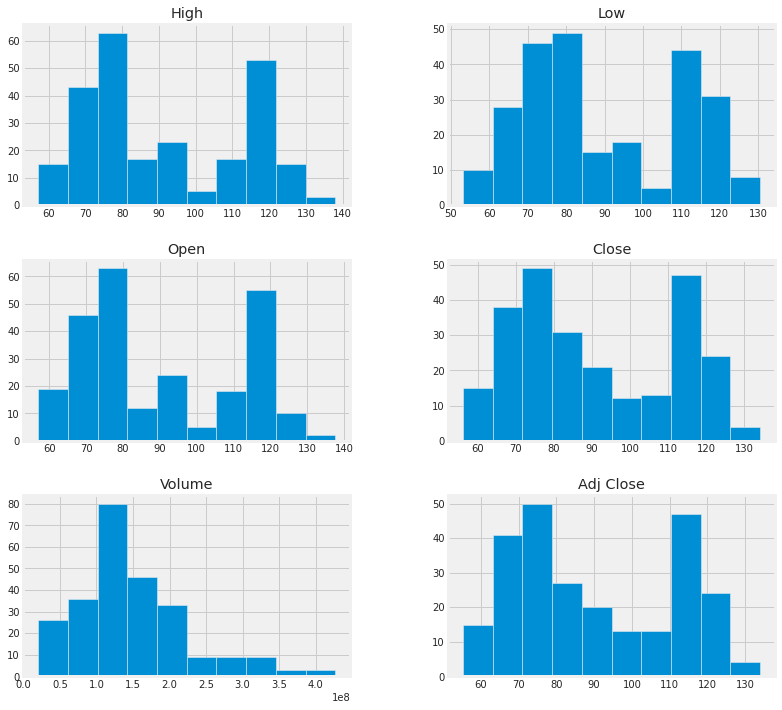

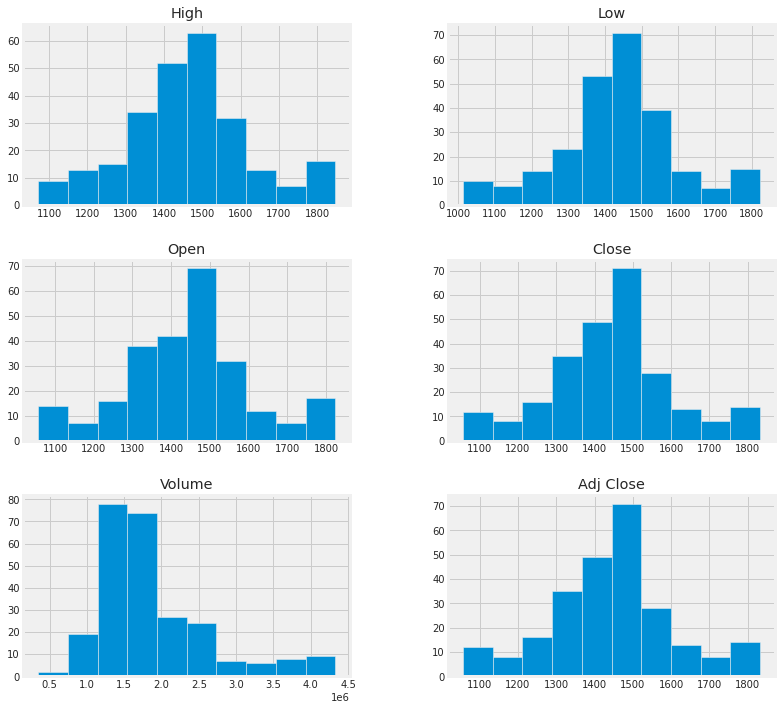

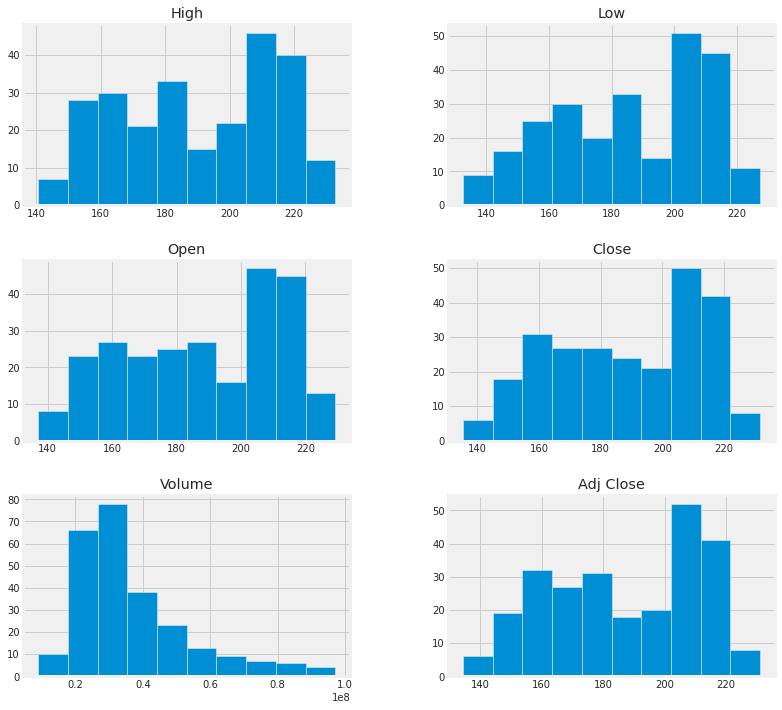

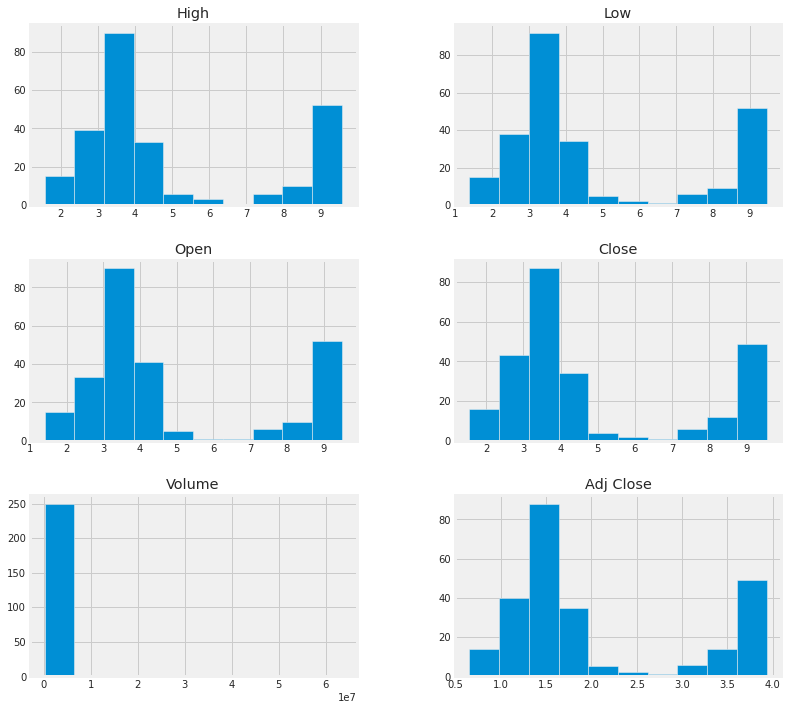

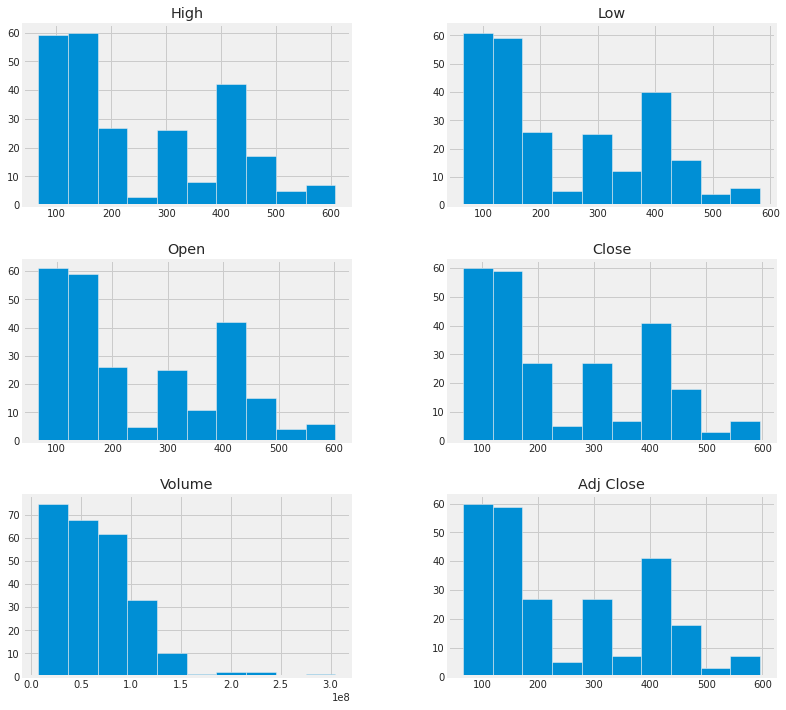

In [48]:
df.groupby("company_name").hist(figsize=(12, 12))

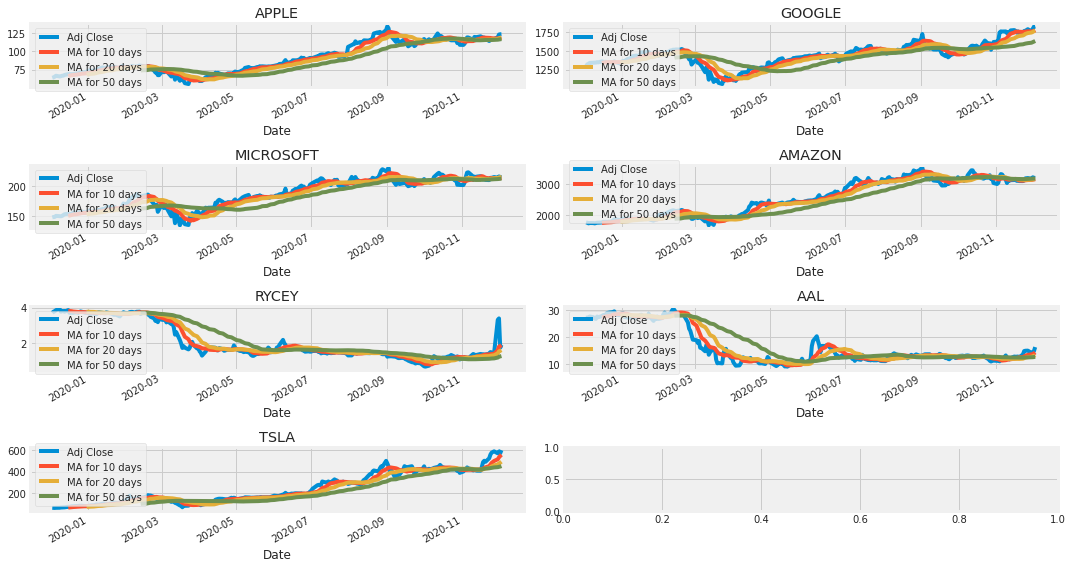

In [70]:
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

RYCEY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,0])
axes[2,0].set_title('RYCEY')

AAL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2,1])
axes[2,1].set_title('AAL')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3,0])
axes[3,0].set_title('TSLA')

fig.tight_layout()

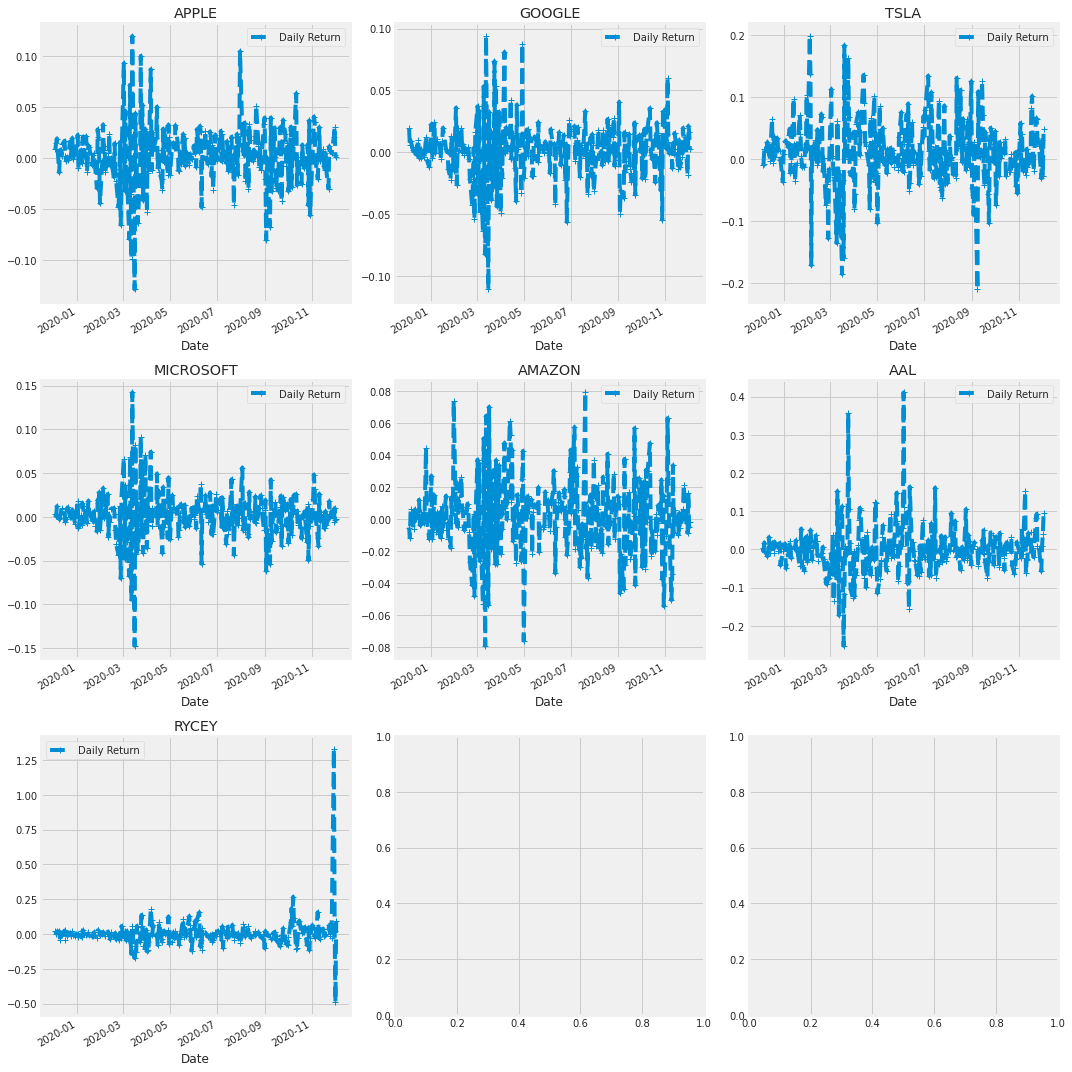

In [71]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_figheight(15)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='+')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='+')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='+')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='+')
axes[1,1].set_title('AMAZON')

RYCEY['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='+')
axes[2,0].set_title('RYCEY')

AAL['Daily Return'].plot(ax=axes[1,2], legend=True, linestyle='--', marker='+')
axes[1,2].set_title('AAL')

TSLA['Daily Return'].plot(ax=axes[0,2], legend=True, linestyle='--', marker='+')
axes[0,2].set_title('TSLA')

fig.tight_layout()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

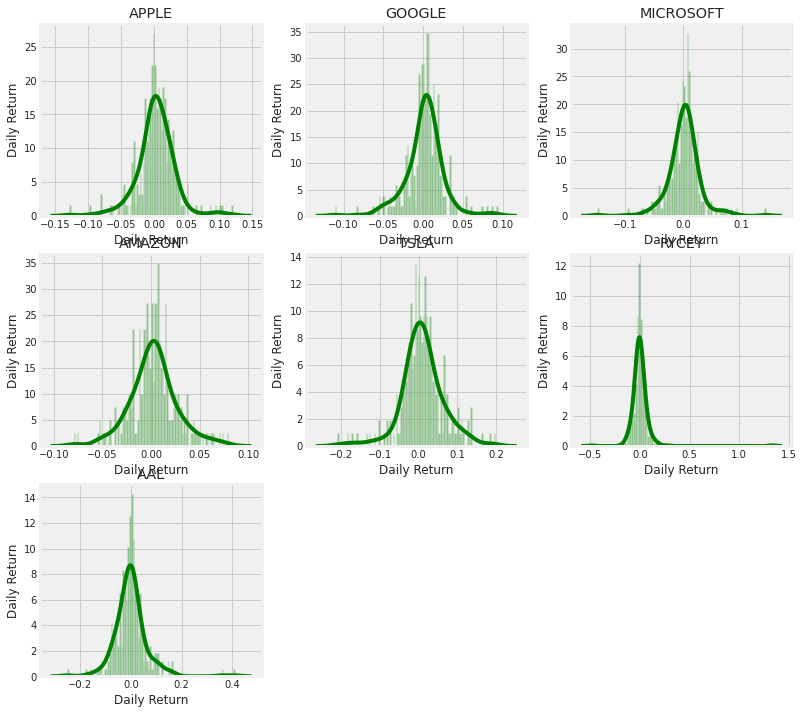

In [76]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))
for i, company in enumerate(company_list, 1):
    plt.subplot(3, 3, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='green')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# AAPL['Daily Return'].hist()

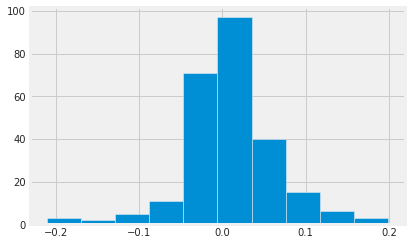

In [81]:
TSLA['Daily Return'].hist()

In [82]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA,RYCEY,AAL
Date,,,,,,,
2019-12-03,63.784916,1295.280029,147.744843,1769.959961,67.239998,3.703943,27.189522
2019-12-04,64.347893,1320.540039,148.279175,1760.689941,66.606003,3.778105,27.279188
2019-12-05,65.291946,1328.130005,148.358353,1740.479980,66.073997,3.790465,27.139706
2019-12-06,66.553131,1340.619995,150.159271,1751.599976,67.178001,3.860506,27.627901
2019-12-09,65.621384,1343.560059,149.773361,1749.510010,67.905998,3.930547,27.388784


In [83]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN,TSLA,RYCEY,AAL
Date,,,,,,,
2019-12-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-04,0.008826,0.019502,0.003617,-0.005237,-0.009429,0.020022,0.003298
2019-12-05,0.014671,0.005748,0.000534,-0.011478,-0.007987,0.003272,-0.005113
2019-12-06,0.019316,0.009404,0.012139,0.006389,0.016709,0.018478,0.017988
2019-12-09,-0.014000,0.002193,-0.002570,-0.001193,0.010837,0.018143,-0.008655


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


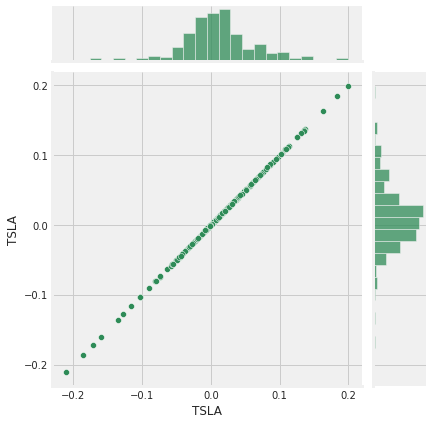

In [87]:
# Comparing tesla to itself should show a perfectly linear relationship
sns.jointplot('TSLA', 'TSLA', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


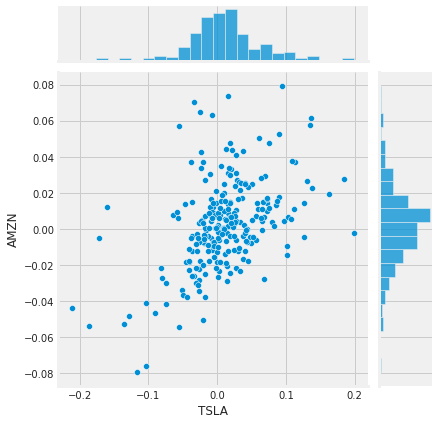

In [94]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('TSLA', 'AMZN', tech_rets, kind='scatter')

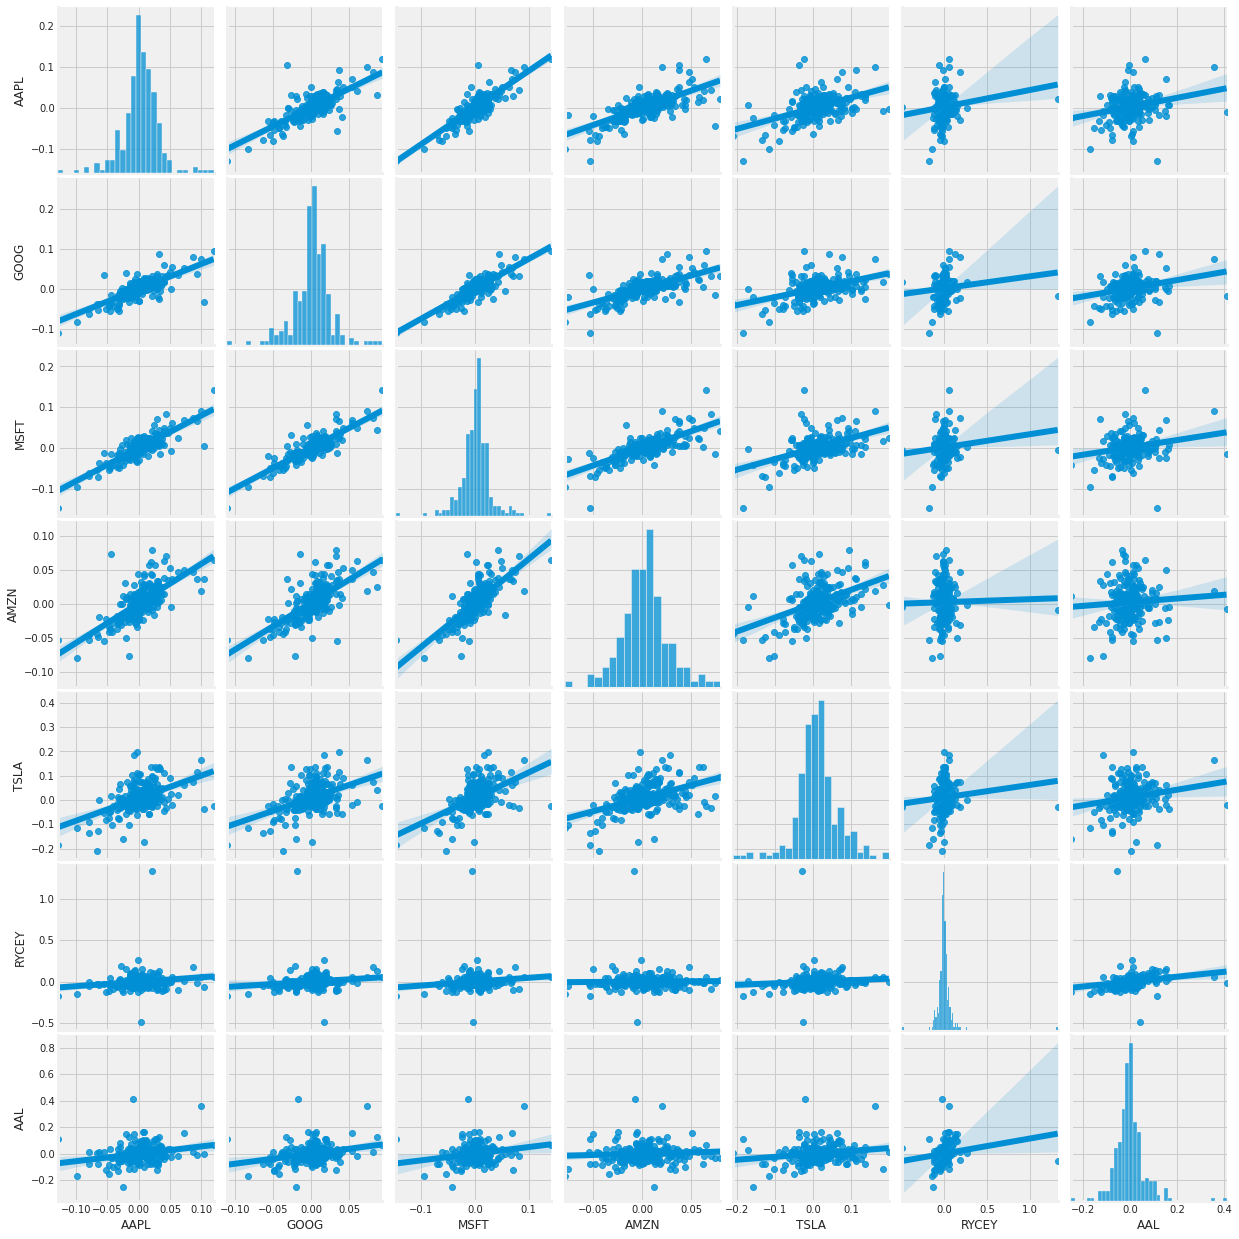

In [96]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

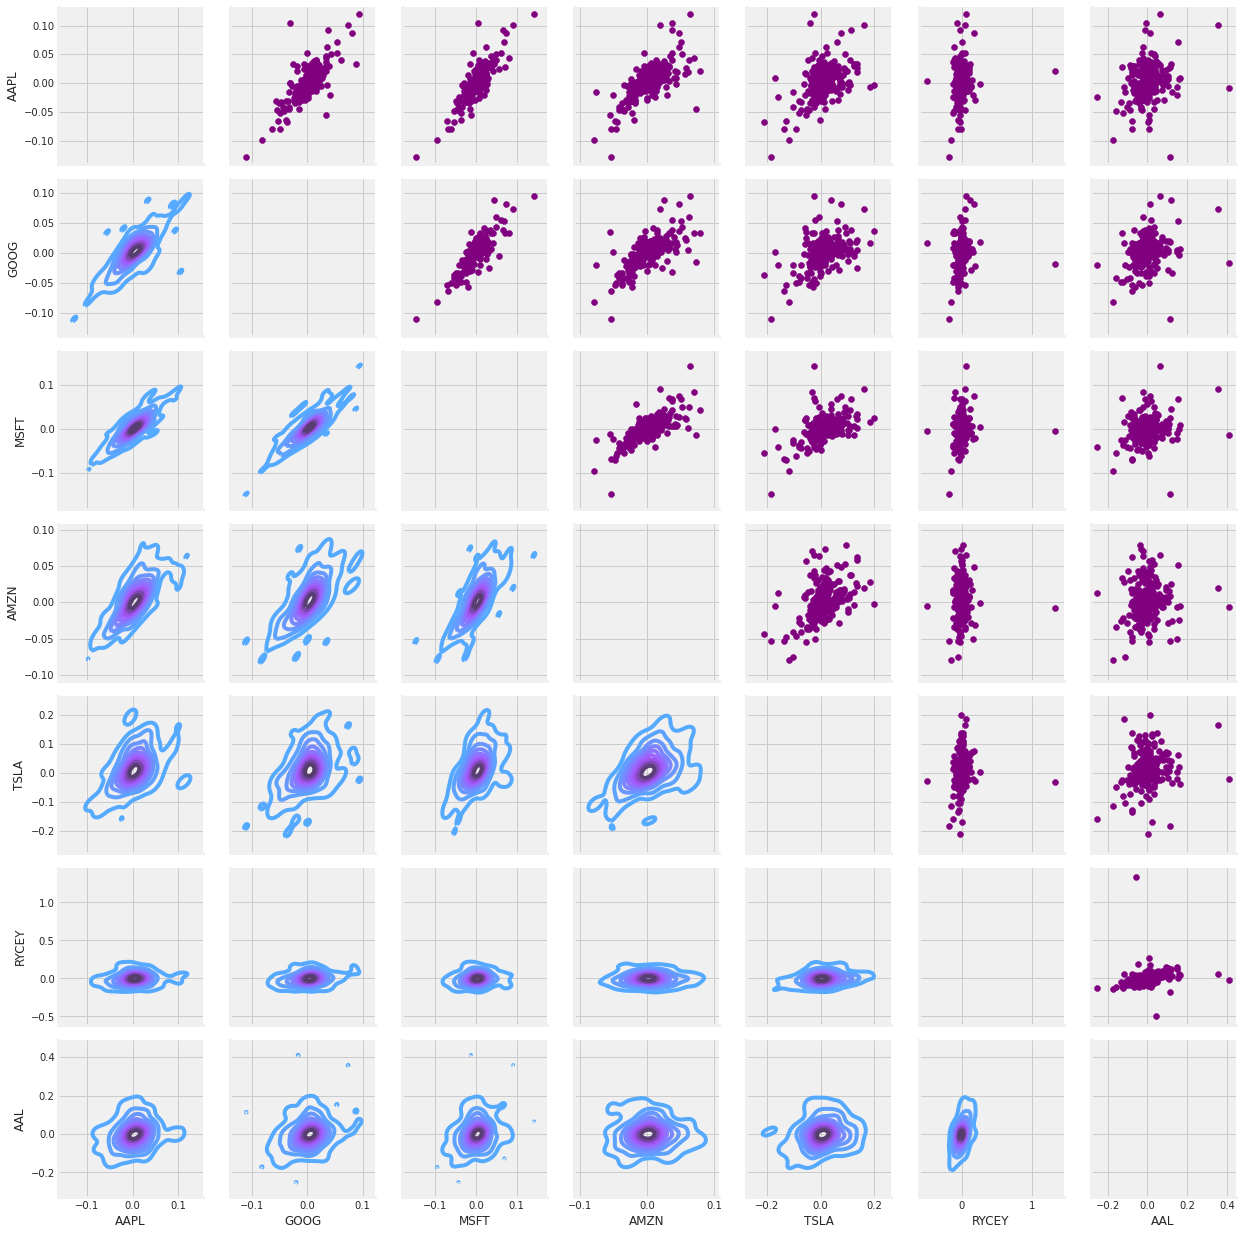

In [100]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

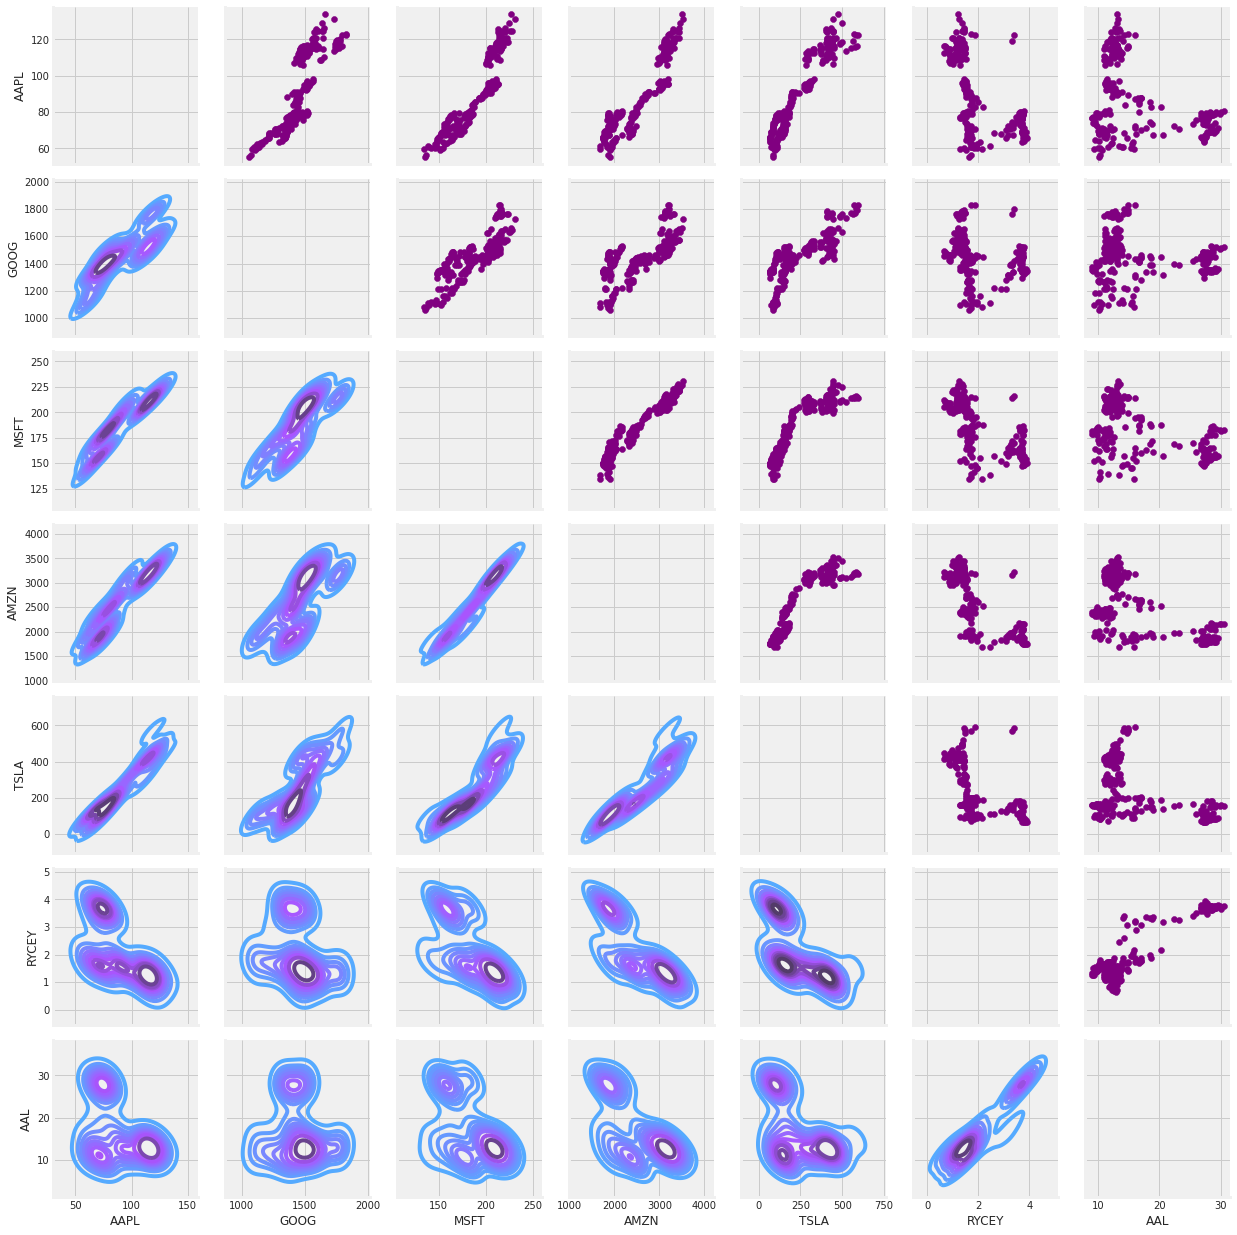

In [101]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

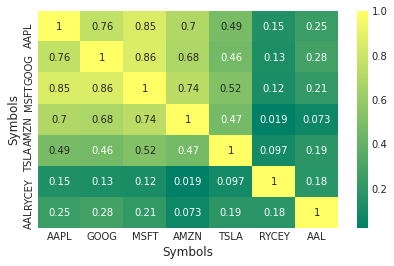

In [102]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

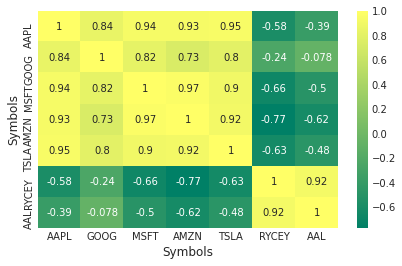

In [103]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

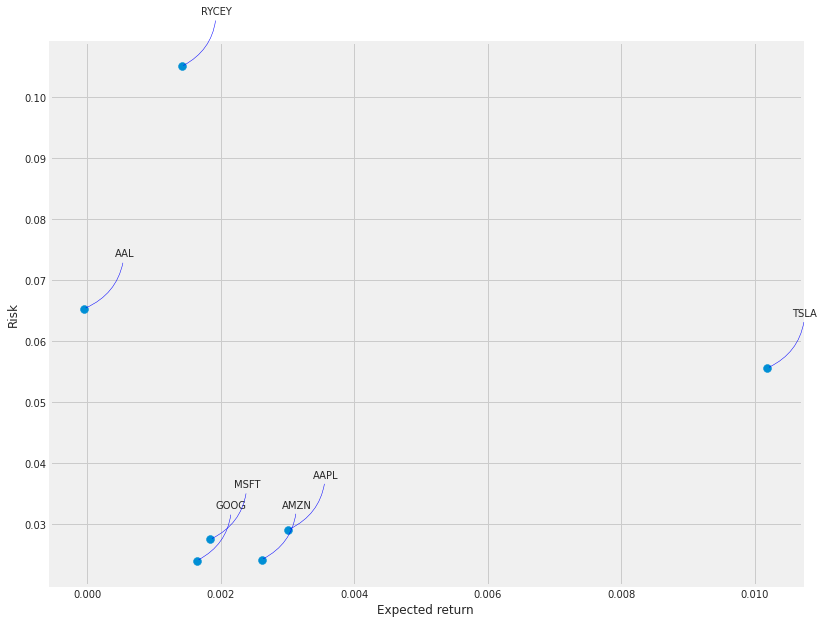

In [104]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [156]:
df = DataReader('RYCEY', data_source='yahoo', start='2008-01-01', end=datetime.now())
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,11.000,10.88,10.90,10.90,102000.0,3.348239
2008-01-03,10.750,10.61,10.73,10.73,80000.0,3.296018
2008-01-04,10.562,10.44,10.51,10.51,75500.0,3.228440
2008-01-07,10.410,10.06,10.06,10.06,85500.0,3.090210
2008-01-08,10.500,10.09,10.09,10.09,98000.0,3.099425
...,...,...,...,...,...,...
2020-11-27,3.400,3.35,3.38,3.37,511100.0,1.420910
2020-11-30,3.390,3.30,3.39,3.31,508300.0,3.310000
2020-12-01,3.420,3.31,3.38,3.39,656100.0,3.390000


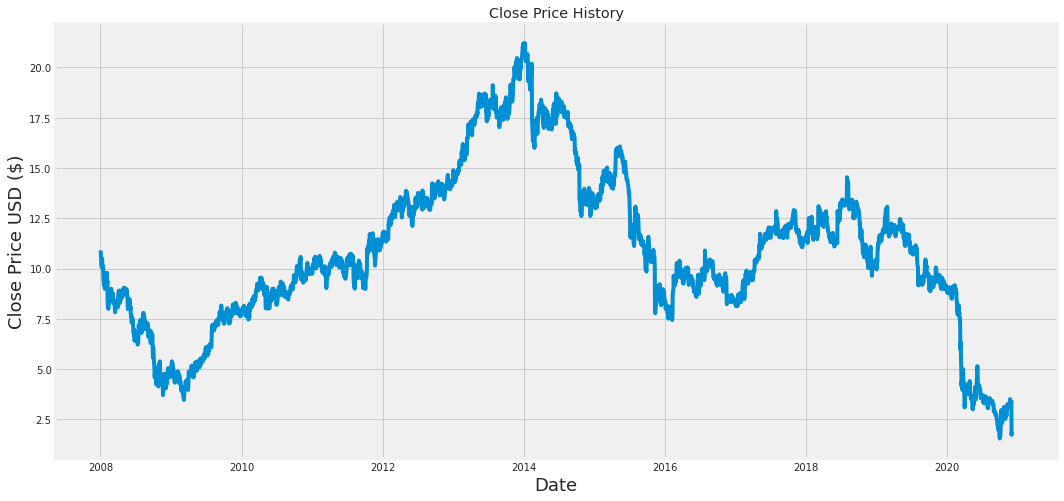

In [157]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [158]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

2604

In [159]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.47568172],
       [0.46703296],
       [0.45584048],
       ...,
       [0.0936101 ],
       [0.00915751],
       [0.01678877]])

In [160]:
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.47568172, 0.46703296, 0.45584048, 0.43294672, 0.43447296,
       0.4502442 , 0.45482296, 0.4319292 , 0.43650796, 0.42877493,
       0.41310543, 0.39936914, 0.39580791, 0.38614167, 0.38817667,
       0.37851038, 0.39936914, 0.39835167, 0.40903543, 0.41717543,
       0.40852667, 0.41666667, 0.41921043, 0.39173791, 0.39784291,
       0.35307285, 0.33577533, 0.32814409, 0.33323161, 0.34595038,
       0.35256409, 0.34188038, 0.34798538, 0.36070414, 0.35663414,
       0.37240538, 0.37494914, 0.37901914, 0.3693529 , 0.3693529 ,
       0.36579162, 0.36630038, 0.36019538, 0.36680914, 0.36487588,
       0.3572446 , 0.34137162, 0.34595038, 0.34798538, 0.34849409,
       0.34340662, 0.31949533, 0.34645909, 0.33272285, 0.33017909,
       0.33526662, 0.34595038, 0.33781033, 0.33730162, 0.33272285])]
[0.3318070710881961]

[array([0.47568172, 0.46703296, 0.45584048, 0.43294672, 0.43447296,
       0.4502442 , 0.45482296, 0.4319292 , 0.43650796, 0.42877493,
       0.41310543, 0.39936914, 0.395

In [161]:

from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2544/2544 [==============================] - 52s 20ms/step - loss: 0.0016


In [162]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.39881450622615555

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


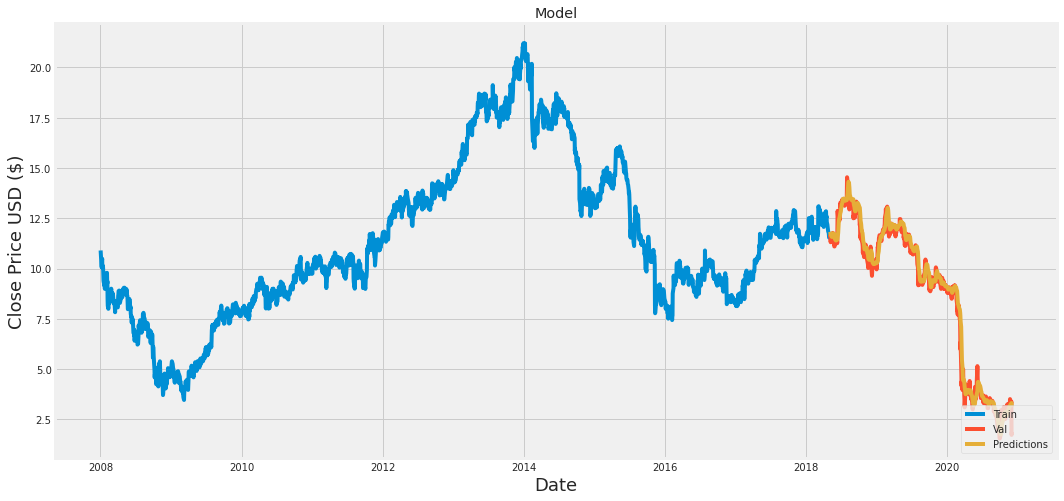

In [163]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [164]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-07,11.59,11.828354
2018-05-08,11.66,11.780448
2018-05-09,11.42,11.758051
2018-05-10,11.31,11.717284
2018-05-11,11.46,11.659835
...,...,...
2020-11-27,3.37,3.259363
2020-11-30,3.31,3.291418
2020-12-01,3.39,3.304849
